# Author :  Pradip Kumar Murmu

# Task 4: Exploratory Data Analysis - Terrorism

### In this this task,performed Exploratory Data Analysis on 'Global Terrorism' dataset.
* As a security/ Defense analyst, try to find out the host zone of terrorism.
* What all security issues and insights you can derive by EDA?

# Terror Attack
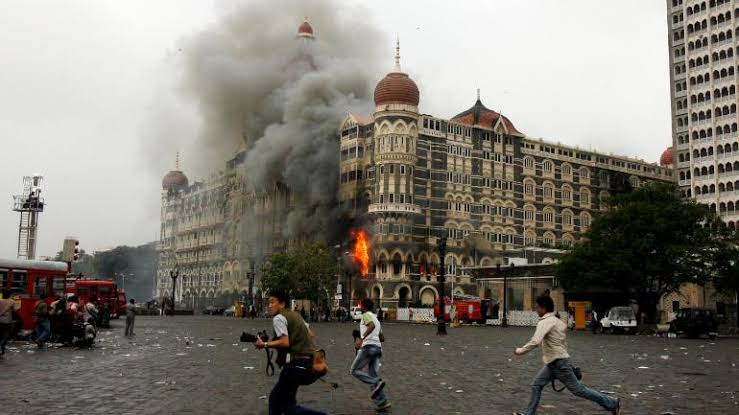

#### A terror attack is an unexpected attack on the civilians that involves intentional use of violence. The intention behind this violent attack might be political, religious and sometimes ideological cause. At times such a violent attack is done to create far or achieve some political motive.



# Import the important libraries and dependency

In [1]:
import pandas as pd # Data Preprocessing
import numpy as np # Linear Algebra

import matplotlib.pyplot as plt # For plotting the data
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from IPython import display

# Reading the data

In [2]:
#load the dataset
data = pd.read_csv(r'C:\\Users\\PEEKAY MURMU\\Desktop\\GRIP Internship\\Task 04\\globalterrorismdb_0718dist.csv', encoding='latin1')

## Display the dataset

In [3]:
pd.set_option('display.max_columns', None)
data.head(10)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

In [4]:
# display the shape of the dataset
data.shape

(181691, 135)

In [5]:
pd.set_option('display.max_rows', None)
data.isnull().sum()

eventid                    0
iyear                      0
imonth                     0
iday                       0
approxdate            172452
extended                   0
resolution            179471
country                    0
country_txt                0
region                     0
region_txt                 0
provstate                421
city                     434
latitude                4556
longitude               4557
specificity                6
vicinity                   0
location              126196
summary                66129
crit1                      0
crit2                      0
crit3                      0
doubtterr                  1
alternative           152680
alternative_txt       152680
multiple                   1
success                    0
suicide                    0
attacktype1                0
attacktype1_txt            0
attacktype2           175377
attacktype2_txt       175377
attacktype3           181263
attacktype3_txt       181263
targtype1     

In [6]:
# label of columns
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

# Data Cleaning

In [7]:
# select the import columns for data analysis purpose
df =data[['iyear', 'extended', 'country_txt','region_txt','city','latitude','longitude','specificity','success', 'attacktype1_txt','gname','targtype1_txt','targsubtype3_txt','motive', 'weaptype1_txt', 'summary','nkill', 'nwound']]

In [8]:
# display 10 records from the dataset
df.head()

,iyear,extended,country_txt,region_txt,city,latitude,longitude,specificity,success,attacktype1_txt,gname,targtype1_txt,targsubtype3_txt,motive,weaptype1_txt,summary,nkill,nwound
0,1970,0,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,1.0,1,Assassination,MANO-D,Private Citizens & Property,NaN,NaN,Unknown,NaN,1.0,0.0
1,1970,0,Mexico,North America,Mexico city,19.371887,-99.086624,1.0,1,Hostage Taking (Kidnapping),23rd of September Communist League,Government (Diplomatic),NaN,NaN,Unknown,NaN,0.0,0.0
2,1970,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,4.0,1,Assassination,Unknown,Journalists & Media,NaN,NaN,Unknown,NaN,1.0,0.0
3,1970,0,Greece,Western Europe,Athens,37.997490,23.762728,1.0,1,Bombing/Explosion,Unknown,Government (Diplomatic),NaN,NaN,Explosives,NaN,NaN,NaN
4,1970,0,Japan,East Asia,Fukouka,33.580412,130.396361,1.0,1,Facility/Infrastructure Attack,Unknown,Government (Diplomatic),NaN,NaN,Incendiary,NaN,NaN,NaN


In [9]:
# Checks the null values
total_val = df.shape[0]
null_val = pd.DataFrame(df.isnull().sum(),columns=['Null values'])
null_val['Available values'] = total_val - null_val['Null values'] 
null_val.T

,iyear,extended,country_txt,region_txt,city,latitude,longitude,specificity,success,attacktype1_txt,gname,targtype1_txt,targsubtype3_txt,motive,weaptype1_txt,summary,nkill,nwound
Null values,0,0,0,0,434,4556,4557,6,0,0,0,0,180594,131130,0,66129,10313,16311
Available values,181691,181691,181691,181691,181257,177135,177134,181685,181691,181691,181691,181691,1097,50561,181691,115562,171378,165380


In [10]:
#renaming the column's labels
df.columns =['Year','Extented', 'Country', 'Region', 'City', 'latitude', 'longitude', 'Specificity', 'Success', 'Attacktype', 'Group','Targettype', 'Targetsubtype','Motive','Weapon', 'Summary', 'Kill', 'Wound']

In [11]:
# Print count of Unknown and unknown values 
print(df.loc[(df['City']=='Unknown')].count()['City'])
print(df.loc[(df['City']=='unknown')].count()['City'])

9775
47


In [12]:
# replace the 'NaN' values and 'unknown' values with 'Unknown' values
df['City'].replace({
    'unknown':'Unknown',
    np.nan : 'Unknown'
}, inplace = True)

In [13]:
# replace nan value 'longitude' and latitude columns with Unknown values
df[['longitude','latitude']].replace({np.nan:'Unknown'}, inplace =True)

In [14]:
df.columns

Index(['Year', 'Extented', 'Country', 'Region', 'City', 'latitude',
       'longitude', 'Specificity', 'Success', 'Attacktype', 'Group',
       'Targettype', 'Targetsubtype', 'Motive', 'Weapon', 'Summary', 'Kill',
       'Wound'],
      dtype='object')

In [15]:
# fill the nan values of kill and wound columns to 0
df['Kill'] = df['Kill'].fillna(0).astype(int)
df['Wound'] = df['Wound'].fillna(0).astype(int)

In [16]:
# put the number of kill and wound into one column as number of casualities
df['Casualities']= df['Kill']+df['Wound']

In [17]:
df[['Targetsubtype','Motive']].replace({np.nan:'Unknown'}, inplace =True)

In [19]:
df.to_csv('modified_terror_data1.csv')


# Exploratory Data Analysis

# Data Visualization

## 1. Number of Terrorist attacks from 1970 to 2017

Text(0.5, 1, 'Number of terrorist attack from 1970 to 2017')

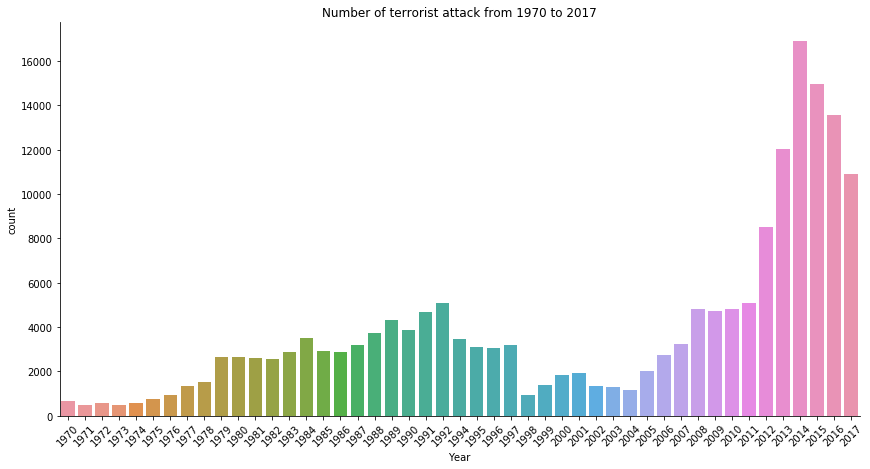

In [20]:
g = sns.catplot(x='Year',
           data=df,
           kind='count',
           height=6,
           aspect=2)
g.set_xticklabels(rotation=45)
plt.title('Number of terrorist attack from 1970 to 2017')

## 2. Number of terrorist attacks in different region of the world

Text(-8.699999999999996, 0.5, 'Region')

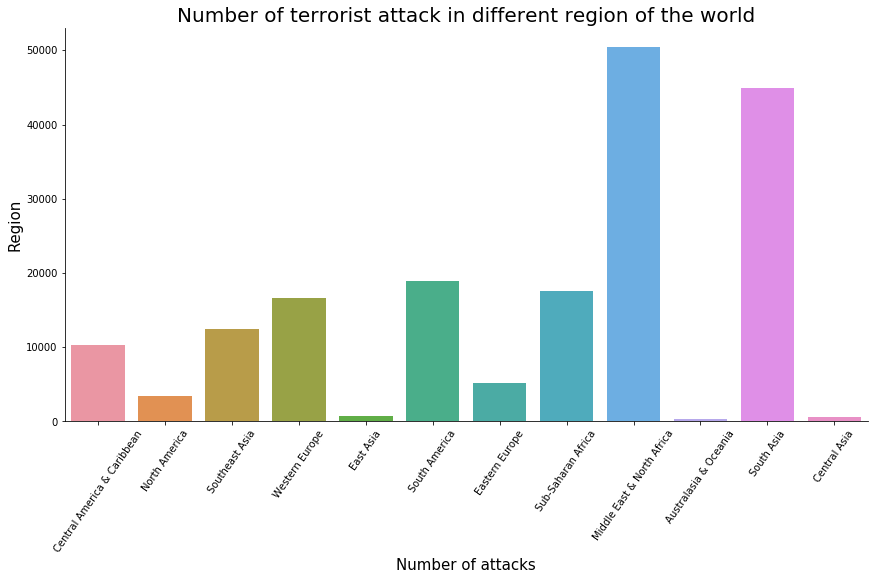

In [21]:
g = sns.catplot(x='Region',
           data=df,
           kind='count',
           height=6,
           aspect=2)
g.set_xticklabels(rotation=55)
plt.title('Number of terrorist attack in different region of the world', fontsize=20)
plt.xlabel('Number of attacks', fontsize=15)
plt.ylabel('Region', fontsize=15)


## 3. Number of terrorist attack were faced in different countries

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

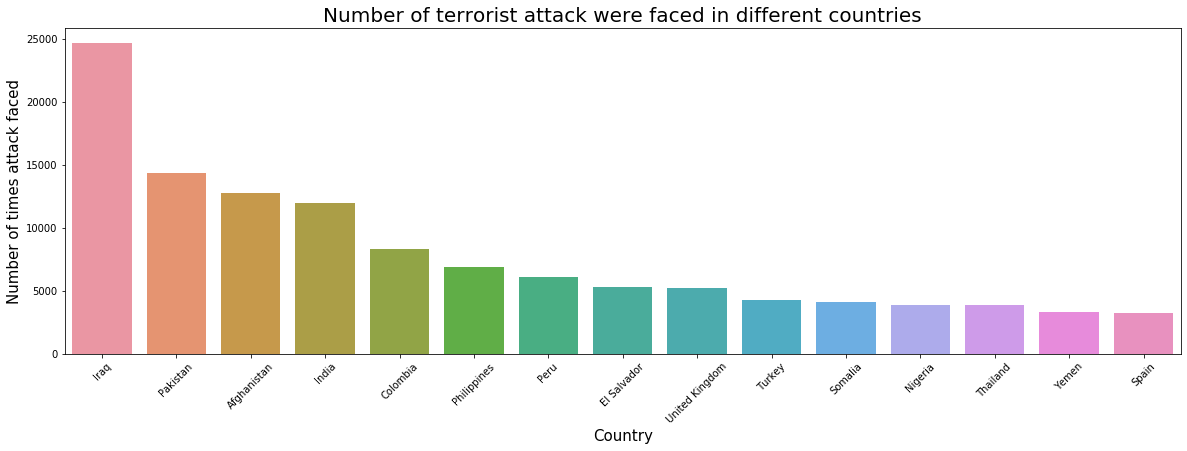

In [22]:
plt.figure(figsize=(20,6))
g = sns.barplot(x = df['Country'].value_counts()[:15].index,
                y = df['Country'].value_counts()[:15].values
               )

plt.title('Number of terrorist attack were faced in different countries', fontsize=20)
plt.xlabel('Country', fontsize=15)
plt.ylabel('Number of times attack faced', fontsize=15)
plt.xticks(rotation=45)

## 4. Number of times terrorist attacks were faced the cities

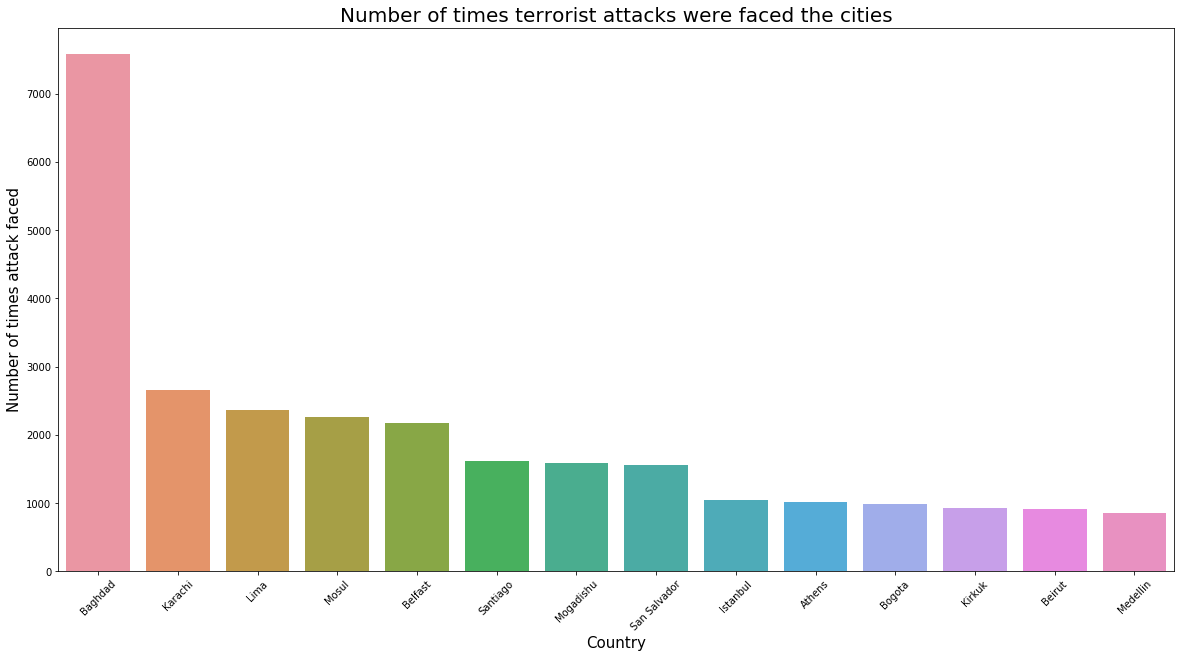

Most of terrorist attack in cities are unknown,approx. 10256  , because of unknown we ignore unknown city.


In [23]:
plt.figure(figsize=(20,10))
g = sns.barplot(x = df['City'].value_counts()[1:15].index,
                y = df['City'].value_counts()[1:15].values,
               )

plt.title('Number of times terrorist attacks were faced the cities', fontsize=20)
plt.xlabel('Country', fontsize=15)
plt.ylabel('Number of times attack faced', fontsize=15)
plt.xticks(rotation=45)
plt.show()
print('Most of terrorist attack in cities are unknown,approx. {}  , because of unknown we ignore unknown city.'.format(df['City'].value_counts()[0]))

## 5. Number of different types of attack by terrorist

Text(-8.699999999999996, 0.5, 'Number of times attack')

<Figure size 432x288 with 0 Axes>

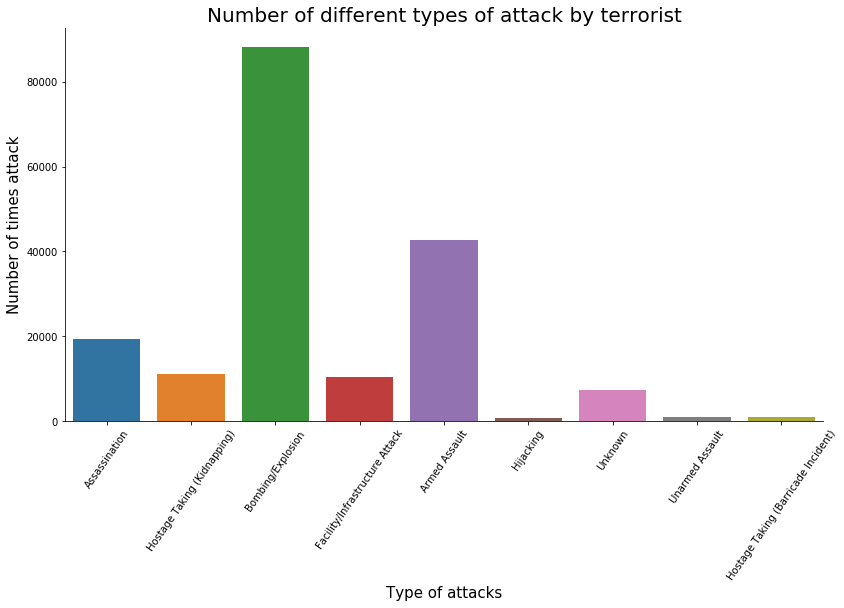

In [24]:
plt.figure()
g = sns.catplot(x='Attacktype',
           data=df,
           kind='count',
            height =6,
            aspect=2
           )
g.set_xticklabels(rotation=55)
plt.title('Number of different types of attack by terrorist', fontsize=20)
plt.xlabel('Type of attacks', fontsize=15)
plt.ylabel('Number of times attack', fontsize=15)

Terrorist attacked using 

## 6. Attacked by different terrorist groups

In [25]:
# Top 15 name of terrorists group who had done maximum of terror attacks
terrorist_group = df['Group'].value_counts().sort_values(ascending = False)[:15]
print(terrorist_group)

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Al-Shabaab                                           3288
New People's Army (NPA)                              2772
Irish Republican Army (IRA)                          2671
Revolutionary Armed Forces of Colombia (FARC)        2487
Boko Haram                                           2418
Kurdistan Workers' Party (PKK)                       2310
Basque Fatherland and Freedom (ETA)                  2024
Communist Party of India - Maoist (CPI-Maoist)       1878
Maoists                                              1630
Liberation Tigers of Tamil Eelam (LTTE)              1606
Name: Group, dtype: int64


From the above data, we can see that Unknown terror attacks are relativly very much greater than all others terror group attacks.
So, we ignore the unknown attacks

In [26]:
terrorist_group = terrorist_group[1:]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

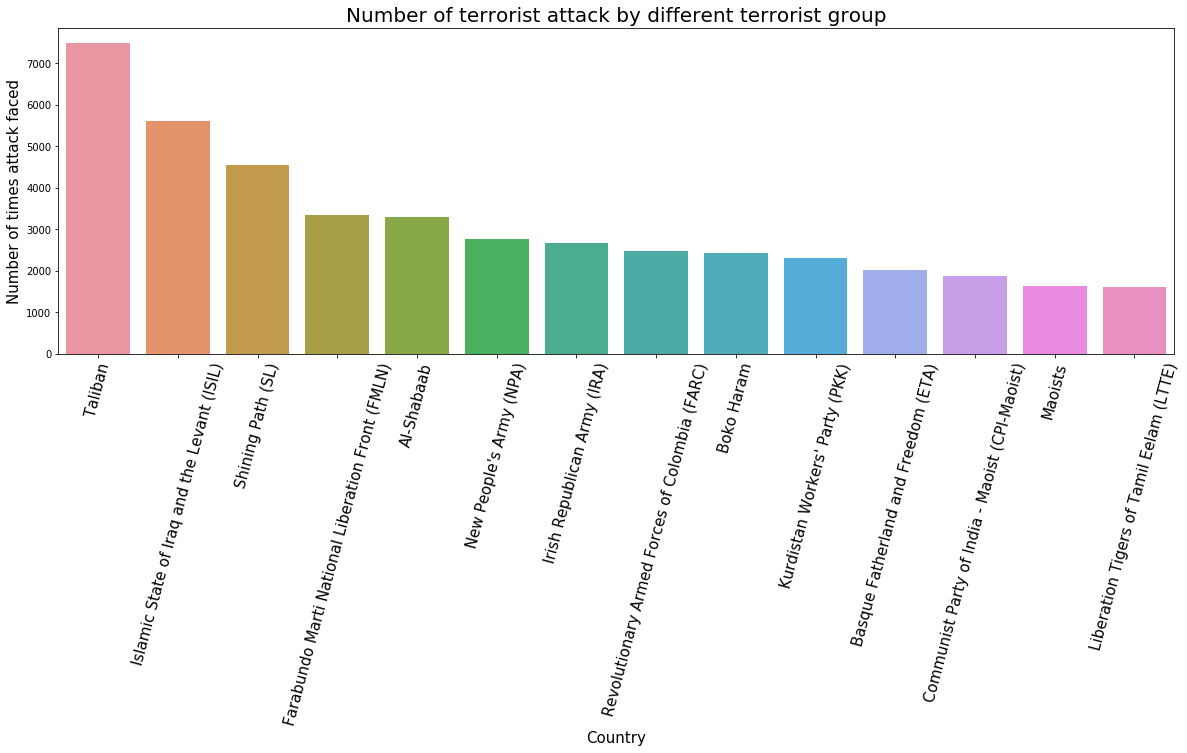

In [27]:

plt.figure(figsize=(20,6))
g = sns.barplot(x = terrorist_group.index,
                y = terrorist_group.values
               )

plt.title('Number of terrorist attack by different terrorist group', fontsize=20)
plt.xlabel('Country', fontsize=15)
plt.ylabel('Number of times attack faced', fontsize=15)
plt.xticks(rotation=75, fontsize=15)

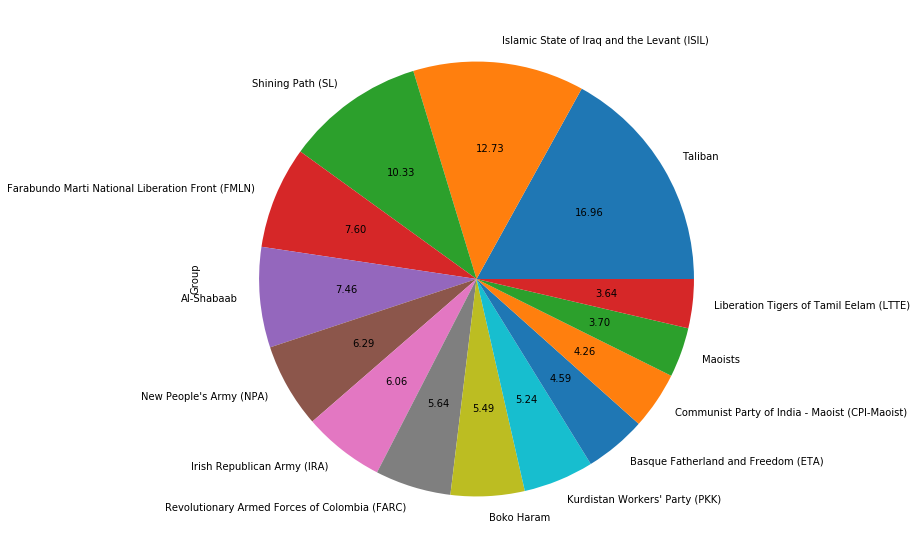

In [28]:
# Percentage of attack by active terrorist group
plt.figure(figsize=(16,10))
terrorist_group.plot(kind='pie', autopct='%.2f')

From the above pie charts, we clearly observe that Taliban, ISIL, Shining Path(SL) are most active terrorist groups. They have carried out most of operations.

## 7.Number of casualities in each year

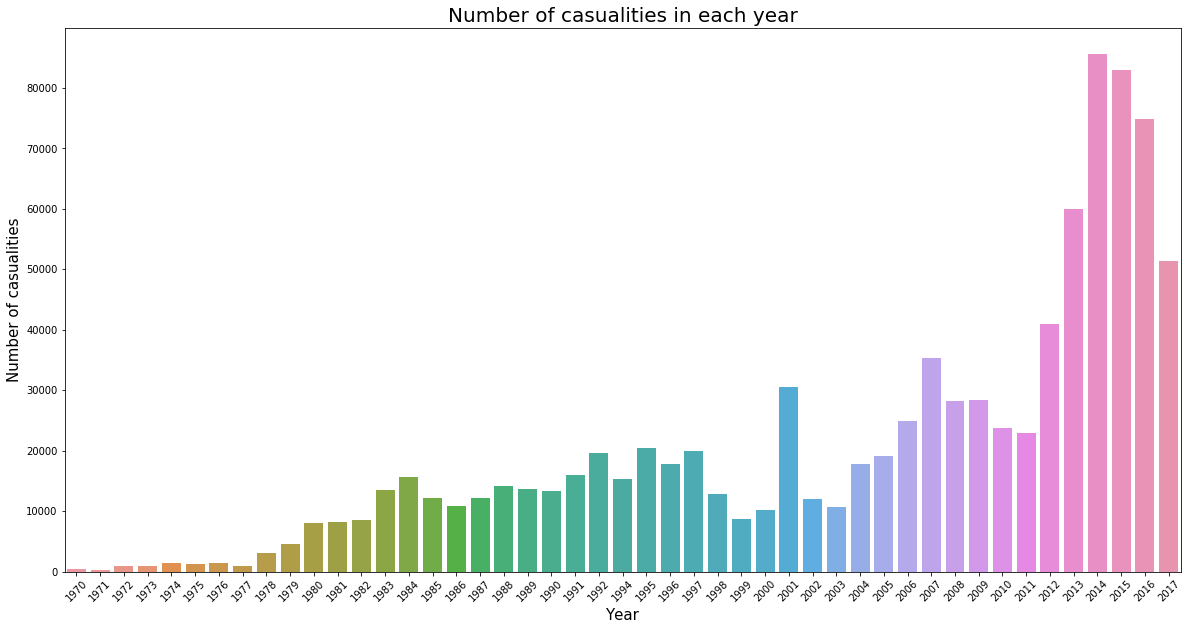

Average of each year from 1970 to 2017 people losses their lives is 19909.27659574468


In [29]:
#Number of casualities in each year
num_of_casuality_in_year = df[['Year','Casualities']].groupby('Year')['Casualities'].agg(np.sum)

plt.figure(figsize=(20,10))
sns.barplot(x = num_of_casuality_in_year.index,
           y = num_of_casuality_in_year.values,
          )
plt.xlabel('Year', fontsize=15)
plt.ylabel('Number of casualities', fontsize=15)
plt.title('Number of casualities in each year', fontsize=20)
plt.xticks(rotation=45)
plt.show()
print('Average of each year from 1970 to 2017 people losses their lives is {}'.format(num_of_casuality_in_year.mean()))

## 8. Terrorists have attacked in each country and region

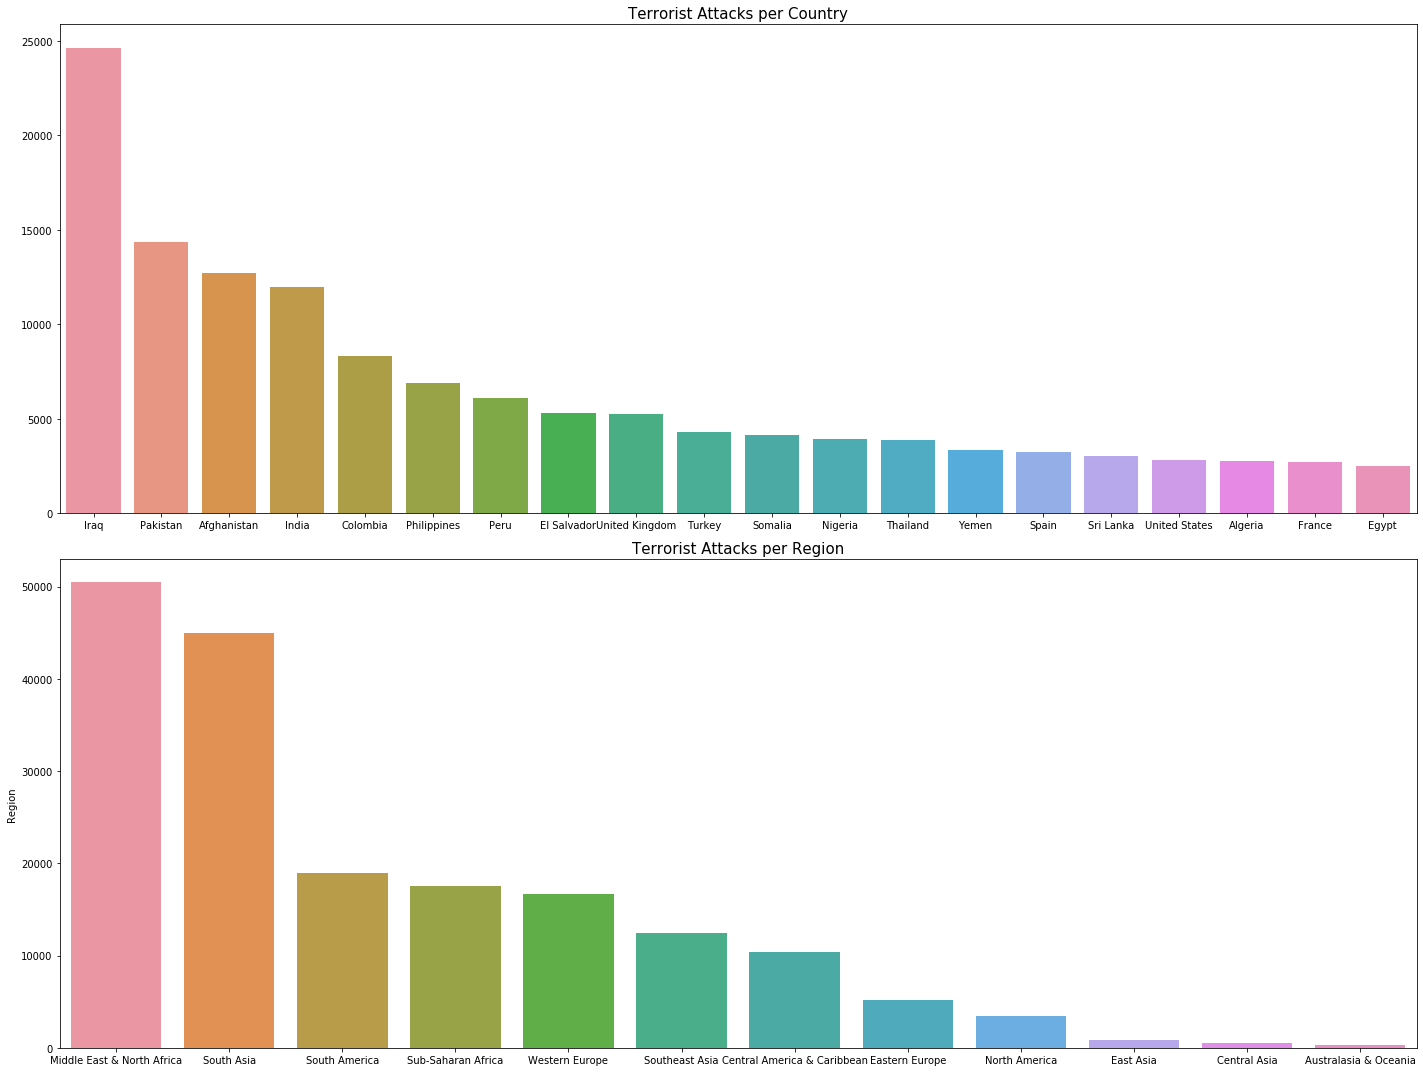

In [30]:
fig, axes = plt.subplots(figsize=(20,15), nrows = 2, ncols=1)
sns.barplot(y = df['Country'].value_counts()[:20].values, 
           x = df['Country'].value_counts()[:20].index,
           ax = axes[0])

axes[0].set_title('Terrorist Attacks per Country', fontsize = 15)

sns.barplot(y = df['Region'].value_counts(),
           x = df['Region'].value_counts().index,
           ax = axes[1],
           )

axes[1].set_title('Terrorist Attacks per Region', fontsize =15)
fig.tight_layout()
plt.show()


## 9. Most affected targets by the terrorist attacks

Violent terror attacks have to  suffer from a lot of loss to property and a number of people have lost their lives also, many more

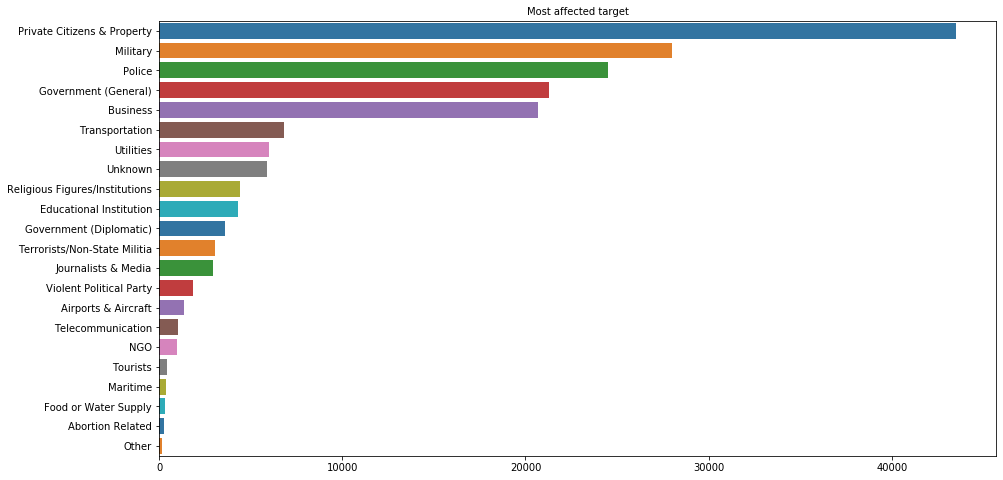

In [31]:
# most affected targets

plt.subplots(figsize=(15,8))
sns.barplot(y = df['Targettype'].value_counts().index,
           x = df['Targettype'].value_counts().values,
           palette = 'tab10')
plt.title('Most affected target', fontsize=10)
plt.show()

In [32]:
print('Total number of terror attacks from 1970 to 2017 is {}'.format(df.shape[0]))
print('Total number of country is affected by this terror attacks is {}'.format(df.Country.nunique()))
print('Total number of casualities in all over the world in 1970-2017 is {}'.format(df['Casualities'].sum()))
print('Out of total casualities, {} number of kills and {} number of wounded people.'.format(df['Kill'].sum(), df['Wound'].sum()))

Total number of terror attacks from 1970 to 2017 is 181691
Total number of country is affected by this terror attacks is 205
Total number of casualities in all over the world in 1970-2017 is 935736
Out of total casualities, 411868 number of kills and 523868 number of wounded people.


## Insights derived from the above EDA 
* Attacks has increased but number of people killed manier times as attacks happend.
* Iraq has the most attacks.
* The Middle East and North Africa Regions has most targeted.
* Maximum number of attacks from bombings/Explosion.
* There are maximum number of attacks in Private citizens and Property.
* Taliban and ISIL are the most active terrorist organizations.

# Thank You